# Day 1&2

This is the notebook for a reduced sample

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# This time, we sample only 5 stars from the dwary galaxy
data_path = '../Materials/data/'
df = pd.read_csv(data_path+'Cas3_total.csv')
ind_dg = df['vr'] <= -300
dg = df[ind_dg]
s1 = dg.sample(n=5)
vr_cas3 = np.array(s1['vr'])



In [4]:
# for each pair of (mean(vr), dispersion(vr)), we define the following function to calculate the log(L) for all the stars in the dwarf galaxy Cas III
def log_Likelihood(mvr, dvr, vr_dg):

    
    logL = np.sum(np.log(1/(dvr * np.sqrt(2 * np.pi))) - ((vr_dg - mvr)**2) / (2 * dvr**2))

    return logL

In [14]:
# We need to significally expand the grid 
# We also want to have a denser grid of 1000x1000 points

mvr_grid = np.linspace(-400, -330,1000)
dvr_grid = np.linspace(3, 35, 1000)

logL_grid = np.zeros((len(mvr_grid), len(dvr_grid)))


In [15]:
# We now can calculate the log(L) for each gridding point
for i in range(logL_grid.shape[0]):
    for j in range(logL_grid.shape[1]):
        logL_grid[i, j] = log_Likelihood(mvr_grid[i], dvr_grid[j], vr_cas3)

print (logL_grid)

[[-219.30432633 -214.96022578 -210.75275146 ...  -23.90501644
   -23.9067736   -23.90853432]
 [-218.27822937 -213.95569479 -209.76911362 ...  -23.89745009
   -23.89922111  -23.90099565]
 [-217.25486009 -212.95383415 -208.78809059 ...  -23.88990386
   -23.8916887   -23.89347702]
 ...
 [-550.59258671 -539.28564311 -528.33255307 ...  -26.34790576
   -26.34518941  -26.34248889]
 [-552.28598157 -540.94344709 -529.95587653 ...  -26.3603927
   -26.35765348  -26.35493015]
 [-553.98210411 -542.60392141 -531.58181479 ...  -26.37289975
   -26.37013763  -26.36739146]]


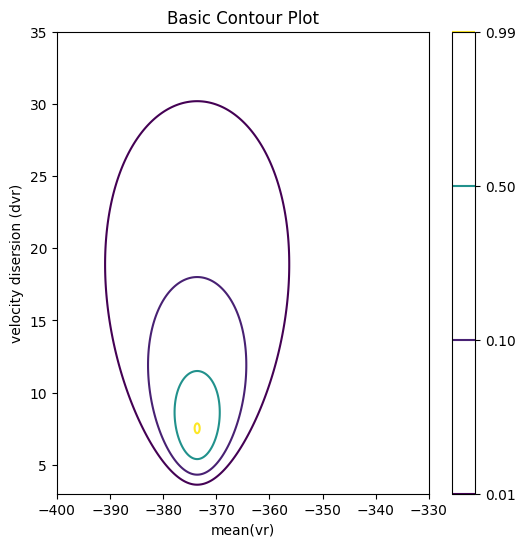

In [16]:
# This is the contour plot of Likelihood, we want it to be normalized to the maximum value
levels = np.array([0.01, 0.1, 0.5, 0.99])
plt.figure(figsize=(6,6))
contour = plt.contour(mvr_grid, dvr_grid, np.exp(logL_grid.T-np.max(logL_grid)), levels=levels)
cbar = plt.colorbar(contour)  # Add colorbar

plt.title('Basic Contour Plot')
plt.xlabel('mean(vr)')
plt.ylabel('velocity disersion (dvr)')
plt.show()

In [17]:
# save the likelihood grid for Day3

np.savetxt(data_path+"mvr_grid_rs.txt", mvr_grid)
np.savetxt(data_path+"dvr_grid_rs.txt", dvr_grid)
np.savetxt(data_path+"logL_grid_rs.txt", logL_grid)



In [20]:
mvr0 = -400.0
dvr0 = 25.0
logL0 = log_Likelihood(mvr0, dvr0, vr_cas3)
step_mvr = 2.0
step_dvr = 1.0
nsteps = 100000

mvr_steps = [mvr0]
dvr_steps = [dvr0]
logL_steps = [logL0]

accepts = []

In [23]:
for i in range(nsteps):


    mvr_steps.append(mvr0)
    dvr_steps.append(dvr0)
    logL_steps.append(logL0)

    mvr1 = mvr0
    dvr1 = dvr0
    logL1 = logL0

    mvr1 = mvr1 + np.random.normal(0, step_mvr)
    dvr1 = dvr1 + np.random.normal(0, step_dvr)
    logL1 = log_Likelihood(mvr1, dvr1, vr_cas3)

    if logL1 > logL0:

        mvr0 = mvr1
        dvr0 = dvr1
        logL0 = logL1
        accepts.append(1)

    else:

        a = np.random.uniform(0, 1)
        if (logL1-logL0) > np.log(a):

            mvr0 = mvr1
            dvr0 = dvr1
            logL0 = logL1
            accepts.append(1)  

0.82463


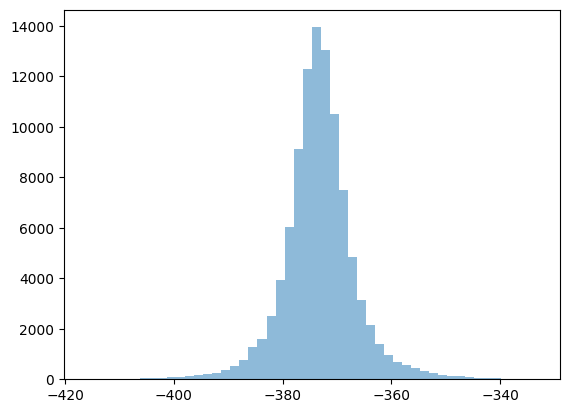

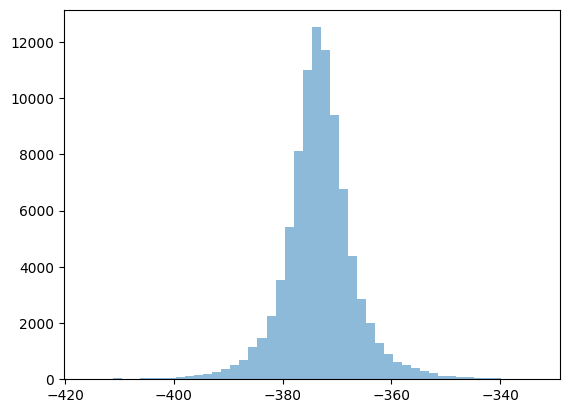

In [24]:
print(len(accepts)/nsteps)

# The optimized step is around the disperson (sigma) of the PDF (FWHM=2.36*sigma)
# Then re-run MCMC usng the optimized steps!
plt.figure()
plt.hist(mvr_steps, bins=50, alpha=0.5, label='mvr');
plt.figure()
plt.hist(mvr_steps[int(nsteps*0.1):], bins=50, alpha=0.5, label='mvr');

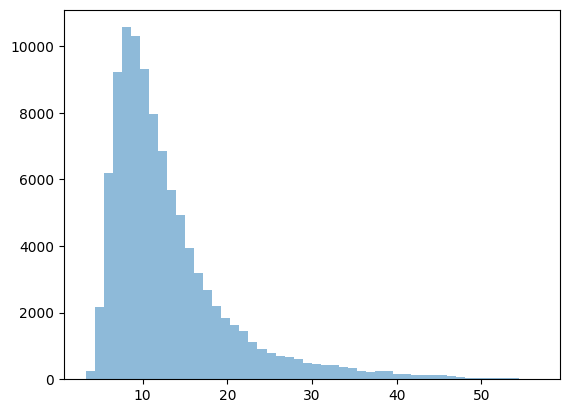

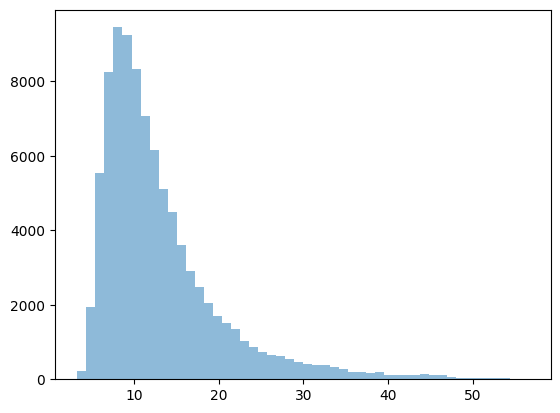

In [25]:
plt.figure()
plt.hist(dvr_steps, bins=50, alpha=0.5, label='dvr');
plt.figure()
plt.hist(dvr_steps[int(nsteps*0.1):], bins=50, alpha=0.5, label='dvr');

In [28]:
chain = np.vstack((mvr_steps, dvr_steps, logL_steps)).T[int(nsteps*0.1):]
np.savetxt(data_path+'chain_Cas3_rs.txt', chain)
